# 03 Build Models

## Imports

* We want AUC ROC

In [32]:
import pandas as pd
import numpy as np
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Functions

In [21]:
def get_metrics(y_true, y_predict, print_scores = True):
    matrix_def = [['tn','fp'], ['fn','tp']]
    matrix = confusion_matrix(y_true, y_predict)
    tn, fp, fn, tp = matrix.ravel()
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    misclass = 1-accuracy
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    precision = tp/(tp+fp)
    if print_scores:
        print('Matrix Definition')
        print(np.array(matrix_def))
        print('')
        print('Confusion Matrix')
        print(matrix)
        print('')
        print('METRICS')
        print('accuracy:', accuracy)
        print('misclass:', misclass)
        print('sensitivity:', sensitivity)
        print('specificity:', specificity)
    else:
        return accuracy, misclass, sensitivity, specificity, precision

## Read in Train and Test Data

In [22]:
with open('../Cleansed_Data/X_train_ss.pkl','rb') as f:
    X_train_ss = pickle.load(f)
    
with open('../Cleansed_Data/X_test_ss.pkl','rb') as f:
    X_test_ss = pickle.load(f)
    
with open('../Cleansed_Data/y_train.pkl','rb') as f:
    y_train = pickle.load(f)
    
with open('../Cleansed_Data/y_test.pkl','rb') as f:
    y_test = pickle.load(f)

## Try Simple Logistic Regression

In [23]:
lr = LogisticRegression()
lr.fit(X_train_ss, y_train)
lr.score(X_train_ss, y_train), lr.score(X_test_ss, y_test)

get_metrics(lr.predict(X_test_ss), y_test)

Matrix Definition
[['tn' 'fp']
 ['fn' 'tp']]

Confusion Matrix
[[1998  100]
 [   7   14]]

METRICS
accuracy: 0.9495044832468146
misclass: 0.05049551675318542
sensitivity: 0.6666666666666666
specificity: 0.9523355576739753


## Try Neural Net

In [24]:
# Check number of inputs
print(X_train_ss.shape[1])
layer1 = X_train_ss.shape[1]
layer2 = 6

167


In [25]:
model = Sequential()
model.add(Dense(layer1, activation='relu', input_dim=X_train_ss.shape[1])) #Makes this dynamic
model.add(Dropout(.4))
model.add(Dense(layer2, activation='relu')) #Makes this dynamic
model.add(Dense(1, activation='sigmoid'))

In [26]:
adam = Adam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])  #mean_squared_error

In [27]:
history = model.fit(X_train_ss, y_train, validation_data=(X_test_ss, y_test), epochs=70, batch_size=32, verbose=0)

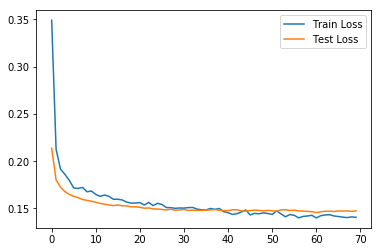

In [28]:
plt.plot(history.history['loss'], label= 'Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')

plt.legend()

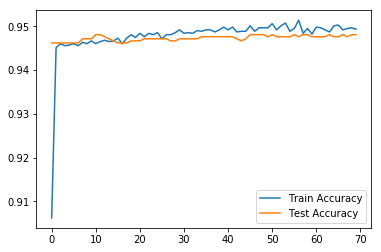

In [29]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend()

In [40]:
roc_auc_score(y_test, model.predict(X_test_ss))

0.8933499584372403

## Pull in Submission Data

In [43]:
with open('../Cleansed_Data/X_submit.pkl', 'rb') as f:
    X_submit = pickle.load(f)

In [47]:
neural_net_predicts = model.predict_classes(X_submit)

In [48]:
submission_df = pd.DataFrame(neural_net_predicts, columns=['WnvPresent'],index=X_submit.index)

submission_df.to_csv('../Submissions/submission_2.csv')

In [54]:
submission_df.WnvPresent.value_counts()

0    116293
Name: WnvPresent, dtype: int64